# Datasets

[https://data.mendeley.com/datasets/tywbtsjrjv/1](https://data.mendeley.com/datasets/tywbtsjrjv/1)

[https://data.mendeley.com/datasets/hb74ynkjcn/1](https://data.mendeley.com/datasets/hb74ynkjcn/1)

[https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset](https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset)

# Installing dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
# Avoid OOM (Out of Memory) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Remove Dodgy Images

In [5]:
import cv2
import imghdr # To check image extensions

In [ ]:
image_exts = ['jpg', 'jpeg', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)   # Reads as an array
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

# Load the Data

In [5]:
data_dir = 'Dataset/Data/'

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 52945 files belonging to 56 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

In [11]:
# This represents the images
batch[0]

array([[[[129.      , 118.      , 124.      ],
         [134.      , 123.      , 129.      ],
         [163.      , 152.      , 158.      ],
         ...,
         [163.      , 157.      , 161.      ],
         [175.      , 169.      , 173.      ],
         [165.      , 159.      , 163.      ]],

        [[118.      , 107.      , 113.      ],
         [155.      , 144.      , 150.      ],
         [122.      , 111.      , 117.      ],
         ...,
         [146.      , 140.      , 144.      ],
         [187.      , 181.      , 185.      ],
         [205.      , 199.      , 203.      ]],

        [[133.      , 122.      , 128.      ],
         [143.      , 132.      , 138.      ],
         [148.      , 137.      , 143.      ],
         ...,
         [156.      , 150.      , 154.      ],
         [176.      , 170.      , 174.      ],
         [170.      , 164.      , 168.      ]],

        ...,

        [[ 13.      ,  16.      ,  23.      ],
         [ 13.      ,  16.      ,  23.      ]

In [12]:
# This represents label
batch[1]

array([35, 18, 44, 55, 55, 55, 55, 55, 55, 32, 43, 14, 51, 33, 21,  6, 23,
       25, 42, 21,  5, 49, 19, 52, 48, 35,  3, 52, 32, 46,  0, 55])

# Scale the data

In [13]:
batch[0].shape

(32, 256, 256, 3)

In [10]:
# Transforming data in range 0 to 1 to speed up computation

data = data.map(lambda x,y: (x/255, y))

In [11]:
scaled_iterator = data.as_numpy_iterator()

In [12]:
batch = scaled_iterator.next()

# Split the Data

In [13]:
train_size = int(len(data)*.85)
val_size = int(len(data)*.10)
test_size = int(len(data)*.05)+2

In [18]:
len(data)

1655

In [19]:
train_size

1406

In [20]:
val_size

165

In [21]:
test_size

84

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = (data.skip(train_size+val_size).take(test_size))

# Building Deep CNN Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Softmax

In [16]:
batch[0].max()

1.0

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(512, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(56, activation='softmax'))

In [19]:
from keras.optimizers import Adam
# Adam is used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       7

# Training

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [24]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[callback])

Epoch 1/10
1406/1406 [==============================] - 763s 539ms/step - loss: 2.4867 - accuracy: 0.3257 - val_loss: 1.6045 - val_accuracy: 0.5953
Epoch 2/10
1406/1406 [==============================] - 829s 589ms/step - loss: 1.2787 - accuracy: 0.6114 - val_loss: 0.9058 - val_accuracy: 0.7570
Epoch 3/10
1406/1406 [==============================] - 867s 616ms/step - loss: 0.8591 - accuracy: 0.7299 - val_loss: 0.6117 - val_accuracy: 0.8248
Epoch 4/10
1406/1406 [==============================] - 862s 612ms/step - loss: 0.6542 - accuracy: 0.7942 - val_loss: 0.5222 - val_accuracy: 0.8500
Epoch 5/10
1406/1406 [==============================] - 866s 616ms/step - loss: 0.5161 - accuracy: 0.8353 - val_loss: 0.4041 - val_accuracy: 0.8801
Epoch 6/10
1406/1406 [==============================] - 885s 628ms/step - loss: 0.4311 - accuracy: 0.8624 - val_loss: 0.3678 - val_accuracy: 0.8903
Epoch 7/10
1406/1406 [==============================] - 866s 615ms/step - loss: 0.3584 - accuracy: 0.8845 - val_

# Plot Performance

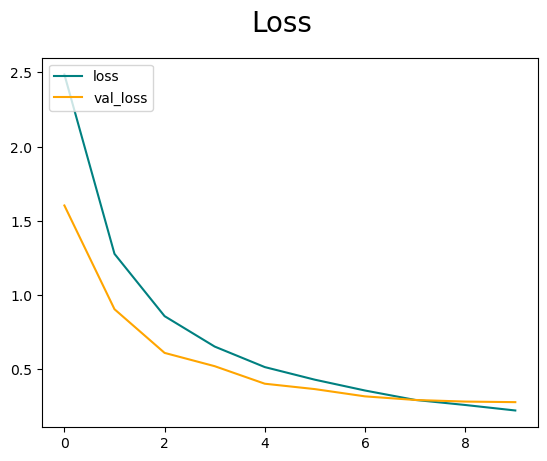

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

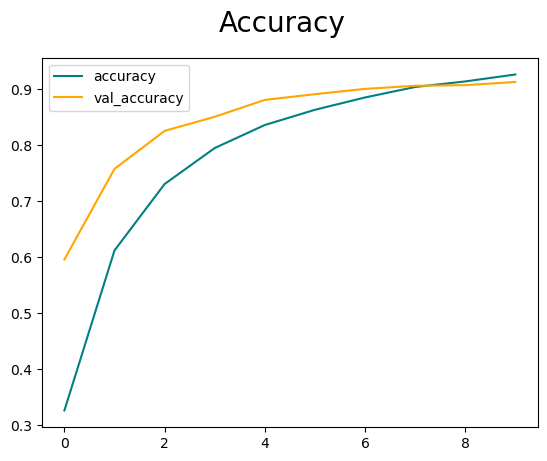

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Try for Efficient B7 architecture